# Filtros lineales separables

In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean

In [96]:
imagen = cv2.imread('images/meb.png', cv2.IMREAD_GRAYSCALE)

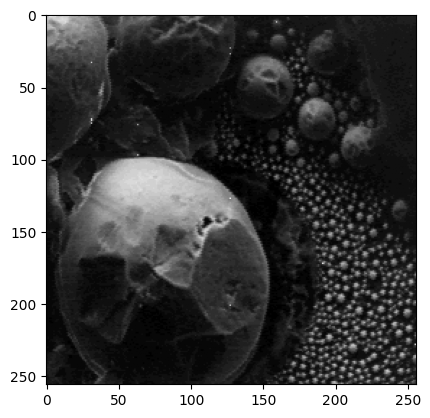

In [95]:
plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)

In [76]:
X = 2048
Y = 2048
imagen_r =  cv2.resize(imagen, (X,Y), interpolation=cv2.INTER_NEAREST)

## Filtro Promedio 3x3

In [94]:
kernel3x3 = np.ones((3, 3), np.float32) / 9
num_iter = 5 
tiempos_3x3 = []
for i in range(num_iter):
    start_time = cv2.getTickCount()
    res3x3 = convolve(imagen_r, kernel3x3,  mode='constant', cval=0)
    time = (cv2.getTickCount() - start_time) / cv2.getTickFrequency()
    tiempos_3x3.append(time)
    print(f'Iteración {i+1} ⏲️: {time:.6f} s')

Iteración 1 ⏲️: 0.041993 s
Iteración 2 ⏲️: 0.052469 s
Iteración 3 ⏲️: 0.054651 s
Iteración 4 ⏲️: 0.050058 s
Iteración 5 ⏲️: 0.077734 s


# Filtro Promedio 3x1 y 1x3

In [98]:
kernel1x3 = np.ones((1, 3), dtype=np.float32) / 3
tiempos = []
for i in range(num_iter):
    start_time = cv2.getTickCount()
    avg = mean(imagen_r, footprint_rectangle((3,1)))
    res3x3_separable = convolve(avg, kernel1x3,  mode='constant', cval=0)
    time = (cv2.getTickCount() - start_time) / cv2.getTickFrequency()
    tiempos.append(time)
    print(f'Iteración {i+1} ⏲️: {time:.6f} s')

Iteración 1 ⏲️: 0.688427 s
Iteración 2 ⏲️: 0.619069 s
Iteración 3 ⏲️: 0.567458 s
Iteración 4 ⏲️: 0.568102 s
Iteración 5 ⏲️: 0.592415 s


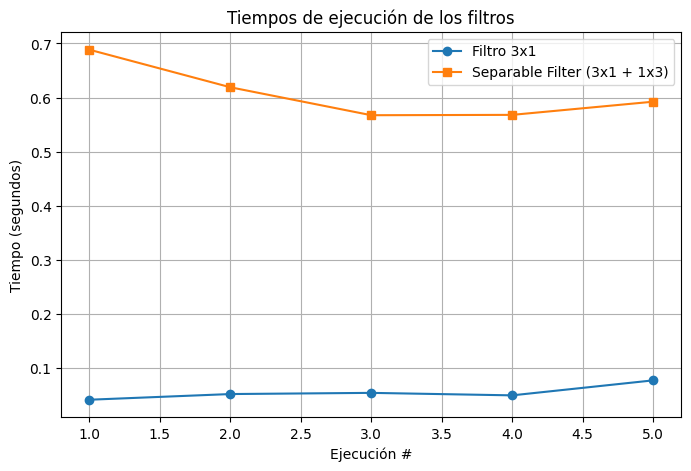

In [99]:
iterations = np.arange(1, len(tiempos) + 1)
plt.figure(figsize=(8,5))
plt.plot(iterations, tiempos_3x3, marker='o', linestyle='-', label='Filtro 3x1')
plt.plot(iterations, tiempos, marker='s', linestyle='-', label='Separable Filter (3x1 + 1x3)')
plt.xlabel("Ejecución #")
plt.ylabel("Tiempo (segundos)")
plt.title("Tiempos de ejecución de los filtros")
plt.legend()
plt.grid(True)
plt.show()


## Efectúe una sustracción de estas imágenes para corroborar el resultado Las dos imágenes resultantes, ¿son idénticas? 

In [101]:
diff = cv2.subtract(res3x3, res3x3_separable)
print(f'Diferencia entre las imágenes: {np.sum(diff)}')
identical = np.all(diff == 0)
print(f'¿Las imágenes son idénticas?: {identical}')

Diferencia entre las imágenes: 25443
¿Las imágenes son idénticas?: False


## Revise la siguiente explicación en separabilidad de filtros lineales. Explique la diferencia de los tiempos de ejecución determinando el número de operaciones elementales (SUMA, RESTA) efectuadas por las dos versiones del filtro. 


## Calcule la duración de ejecución que se debería obtener con un filtro promedio 10 veces más grande (es decir de tamaño 30x30). Verifique este resultado experimentalmente e intente explicar el tiempo de cálculo observado (pensando en los métodos de optimización utilizables con el filtro promedio separable).